In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/tipqc/CPE311 - Paala/RT_IOT2022.csv')
df.columns

Index(['no', 'id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
  

In [7]:
df.head()

,no,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [12]:
df['Attack_type'].unique()

array(['MQTT_Publish', 'Thing_Speak', 'Wipro_bulb', 'ARP_poisioning',
       'DDOS_Slowloris', 'DOS_SYN_Hping', 'Metasploit_Brute_Force_SSH',
       'NMAP_FIN_SCAN', 'NMAP_OS_DETECTION', 'NMAP_TCP_scan',
       'NMAP_UDP_SCAN', 'NMAP_XMAS_TREE_SCAN'], dtype=object)

In [13]:
df['proto'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [16]:
df['id.resp_p'].unique()

array([ 1883,    80,    53, ..., 45685, 49179, 58631], dtype=int64)

In [31]:
df_to_transform = df[['no', 'id.orig_p', 
                      'id.resp_p',
                      'down_up_ratio',
                      'proto', 
                      'service',
                      'flow_duration', 
                      'payload_bytes_per_second',
                      'active.avg',
                      'idle.avg',
                      'Attack_type']]

In [21]:
df_to_transform.to_csv('C:/Users/tipqc/CPE311 - Paala/Transformed_IoT2022.csv', index=False)

In [22]:
tf_iotDF = pd.read_csv('C:/Users/tipqc/CPE311 - Paala/Transformed_IoT2022.csv')

In [23]:
tf_iotDF.head()

,no,id.orig_p,id.resp_p,down_up_ratio,proto,service,flow_duration,payload_bytes_per_second,active.avg,idle.avg,Attack_type
0,0,38667,1883,0.555556,tcp,mqtt,32.011598,3.373777,2.282415e+06,2.972918e+07,MQTT_Publish
1,1,51143,1883,0.555556,tcp,mqtt,31.883584,3.387323,2.028307e+06,2.985528e+07,MQTT_Publish
2,2,44761,1883,0.555556,tcp,mqtt,32.124053,3.237450,2.281904e+06,2.984215e+07,MQTT_Publish
3,3,60893,1883,0.555556,tcp,mqtt,31.961063,3.253959,2.047288e+06,2.991377e+07,MQTT_Publish
4,4,51087,1883,0.555556,tcp,mqtt,31.902362,3.385329,2.087657e+06,2.981470e+07,MQTT_Publish


In [25]:
tf_iotDF.Attack_type.value_counts()

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

ValueError: x must be 1D

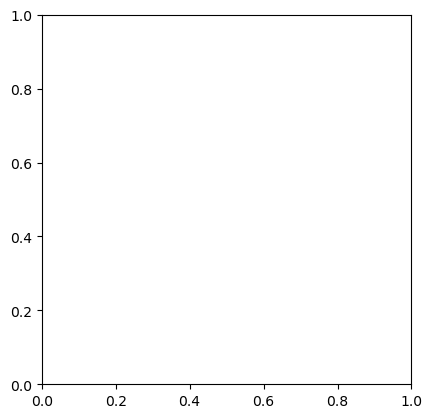

In [41]:
#plt.plot(dataframe)
#plt.title('Attack Type Percentage')
#plt.xlabel('Hello')
#plt.ylabel('Yes')

index_tf = [tf_iotDF['Attack_type'].value_counts()]
plt.pie(index_tf)

([<matplotlib.patches.Wedge at 0x21bb18f0560>,
 [Text(0.4772720865178074, 0.9910657674599294, ''),
  Text(-0.9910657898026471, 0.47727204012266977, ''),
  Text(1.0298943251329445e-07, -1.0999999999999954, '')])

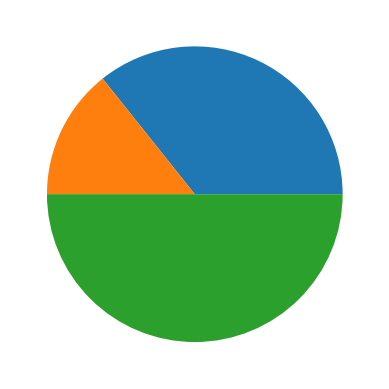

In [39]:
dataframe = [0.5, 0.2, 0.7]
# plt.plot(dataframe)
#plt.title('Attack Type Percentage')
#plt.xlabel('Hello')
#plt.ylabel('Yes')

plt.pie(dataframe) """ I used these codes to remember how functions of plt work.
                        I was going to analyze the frequency percentage of the Attack types in the dataset. """